In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
df = pd.read_csv('../input/global-mean-sea-level-1993-2024/global_mean_sea_level_1993-2024.csv')

In [3]:
df.head()

,AltimeterType,MergedFileCycle,YearPlusFraction,NumberOfObservations,NumberOfWeightedObservations,GMSLNoGIA,StdDevGMSLNoGIA,SmoothedGMSLNoGia,GMSLWithGIA,StdDevGMSLWithGIA,SmoothedGMSLWithGIA,SmoothedGMSLWithGIASigremoved,SmoothedGMSLNoGIASigremoved
0,0,11,1993.011526,466881,338409.69,-37.91,89.01,-37.67,-37.90,89.01,-37.66,-37.64,-37.65
1,0,12,1993.038692,459563,333609.59,-40.95,89.95,-39.07,-40.94,89.95,-39.06,-38.53,-38.54
2,0,13,1993.065858,402996,292736.50,-41.09,86.90,-39.11,-41.07,86.90,-39.09,-38.16,-38.18
3,0,14,1993.093025,462894,336670.31,-43.38,88.73,-39.40,-43.36,88.73,-39.38,-38.12,-38.14
4,0,15,1993.120191,460498,332486.09,-38.66,89.87,-38.51,-38.63,89.87,-38.48,-36.96,-36.99


In [4]:
df.describe()

,AltimeterType,MergedFileCycle,YearPlusFraction,NumberOfObservations,NumberOfWeightedObservations,GMSLNoGIA,StdDevGMSLNoGIA,SmoothedGMSLNoGia,GMSLWithGIA,StdDevGMSLWithGIA,SmoothedGMSLWithGIA,SmoothedGMSLWithGIASigremoved,SmoothedGMSLNoGIASigremoved
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000
mean,25.659247,595.063356,2008.868445,452504.147260,329798.204949,10.650248,86.919546,10.670265,14.514529,86.993193,14.53417,14.567320,10.703416
std,158.103104,337.743202,9.168952,39237.643213,28081.114671,28.657953,5.390879,28.526263,30.845763,5.438813,30.72112,30.533593,28.325750
min,0.000000,11.000000,1993.011526,1339.000000,949.800000,-43.380000,74.200000,-39.400000,-43.360000,74.220000,-39.38000,-38.530000,-38.540000
25%,0.000000,302.750000,2000.931958,450445.750000,332010.982500,-12.457500,83.607500,-12.550000,-10.597500,83.647500,-10.63000,-10.412500,-12.350000
50%,0.000000,595.500000,2008.879513,460724.500000,334854.200000,5.080000,85.990000,4.980000,8.985000,85.990000,8.47000,8.870000,4.830000
75%,0.000000,887.250000,2016.799977,465951.250000,336881.827500,35.662500,88.552500,36.120000,41.675000,88.710000,42.05250,42.927500,37.035000
max,999.000000,1179.000000,2024.720440,475359.000000,342789.190000,76.420000,118.890000,72.120000,83.850000,118.950000,79.60000,75.500000,67.900000


In [5]:
df.shape

(1168, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AltimeterType                  1168 non-null   int64  
 1   MergedFileCycle                1168 non-null   int64  
 2   YearPlusFraction               1168 non-null   float64
 3   NumberOfObservations           1168 non-null   int64  
 4   NumberOfWeightedObservations   1168 non-null   float64
 5   GMSLNoGIA                      1168 non-null   float64
 6   StdDevGMSLNoGIA                1168 non-null   float64
 7   SmoothedGMSLNoGia              1168 non-null   float64
 8   GMSLWithGIA                    1168 non-null   float64
 9   StdDevGMSLWithGIA              1168 non-null   float64
 10  SmoothedGMSLWithGIA            1168 non-null   float64
 11  SmoothedGMSLWithGIASigremoved  1168 non-null   float64
 12  SmoothedGMSLNoGIASigremoved    1168 non-null   f

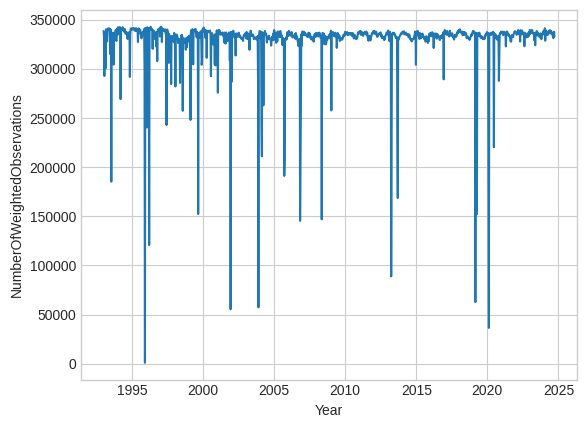

In [7]:
year = df['YearPlusFraction']
weighted_obsv = df['NumberOfWeightedObservations']
plt.plot(year,weighted_obsv)
plt.xlabel('Year')
plt.ylabel('NumberOfWeightedObservations')

plt.show()

In [8]:
# simply do scatterplot(columnName) if you want to review the many other data
def scatterplot(col):
    plt.scatter(df['YearPlusFraction'], df[col], alpha=0.5)
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.show()

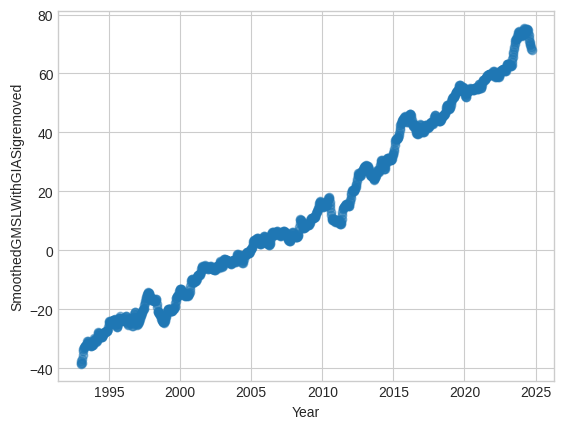

In [9]:
scatterplot('SmoothedGMSLWithGIASigremoved')

In [10]:
# Predict using a simple linear regression model
from sklearn.linear_model import LinearRegression

X = df['YearPlusFraction'].values.reshape(-1, 1)
y = df['SmoothedGMSLWithGIASigremoved'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

last_year = int(df['YearPlusFraction'].max())
future_years = np.array(range(last_year + 1, last_year + 11)).reshape(-1, 1)

future_predictions = model.predict(future_years)

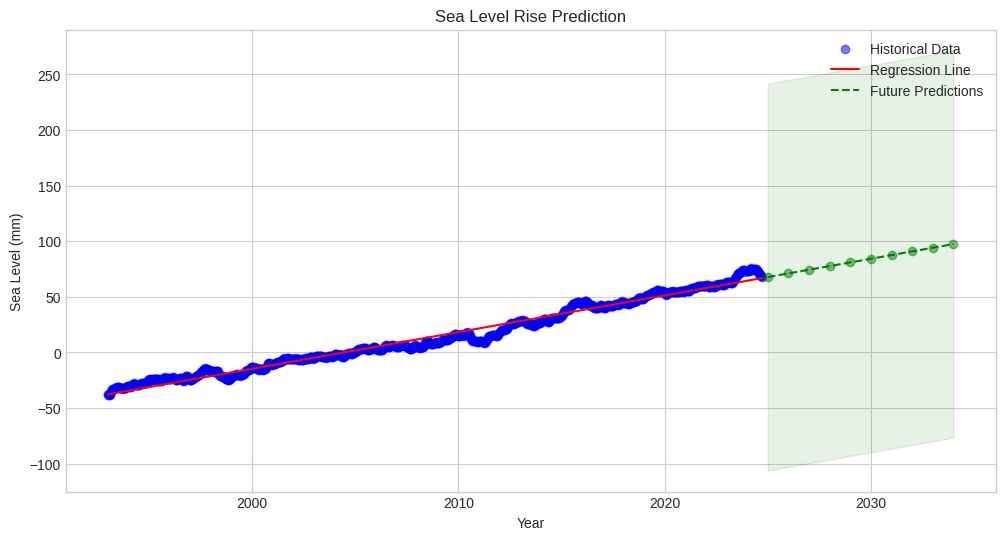


Predicted sea levels for the next 10 years:
Year 2025: 67.75 mm
Year 2026: 71.05 mm
Year 2027: 74.34 mm
Year 2028: 77.64 mm
Year 2029: 80.94 mm
Year 2030: 84.24 mm
Year 2031: 87.53 mm
Year 2032: 90.83 mm
Year 2033: 94.13 mm
Year 2034: 97.42 mm


In [11]:
# Plot
plt.figure(figsize=(12, 6))

plt.scatter(df['YearPlusFraction'], df['SmoothedGMSLWithGIASigremoved'], color='blue', alpha=0.5, label='Historical Data')

plt.plot(X, model.predict(X), color='red', label='Regression Line')

plt.plot(future_years, future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.scatter(future_years, future_predictions, color='green', alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Sea Level (mm)')
plt.title('Sea Level Rise Prediction')
plt.legend()
plt.grid(True)

std_dev = df['StdDevGMSLWithGIA'].values.mean()
plt.fill_between(future_years.flatten(),
                 (future_predictions - 2*std_dev).flatten(),
                 (future_predictions + 2*std_dev).flatten(),
                 color='green', alpha=0.1, label='95% Confidence Interval')

plt.show()

print("\nPredicted sea levels for the next 10 years:")
for year, prediction in zip(future_years.flatten(), future_predictions.flatten()):
    print(f"Year {int(year)}: {prediction:.2f} mm")